In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('notebook')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

In [43]:
train=pd.read_csv('train.csv').drop('id',axis=1)
label=train['isDefault']
train

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,25000.0,3,14.49,860.41,C,C4,2659.0,7 years,1,72000.0,...,6.0,2.0,12.0,13.0,10.0,14.0,0.0,0.0,0.0,3.0
799996,17000.0,3,7.90,531.94,A,A4,29205.0,10+ years,0,99000.0,...,15.0,16.0,2.0,19.0,2.0,7.0,0.0,0.0,0.0,0.0
799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,65000.0,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,96000.0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0


RangeIndex(start=0, stop=800000, step=1)

SyntaxError: invalid syntax (<ipython-input-9-2dc3e31413b6>, line 1)

In [21]:
numerical_feature = list(train.select_dtypes(exclude=['object']).columns)
category_feature = list(filter(lambda x: x not in numerical_feature,list(train.columns)))
#数值类型
df_feature={}
df_feature['category_feature']=category_feature
df_feature['numerical_feature']=numerical_feature
df_feature

{'category_feature': ['grade',
  'subGrade',
  'employmentLength',
  'issueDate',
  'earliesCreditLine'],
 'numerical_feature': ['loanAmnt',
  'term',
  'interestRate',
  'installment',
  'employmentTitle',
  'homeOwnership',
  'annualIncome',
  'verificationStatus',
  'purpose',
  'postCode',
  'regionCode',
  'dti',
  'delinquency_2years',
  'ficoRangeLow',
  'ficoRangeHigh',
  'openAcc',
  'pubRec',
  'pubRecBankruptcies',
  'revolBal',
  'revolUtil',
  'totalAcc',
  'initialListStatus',
  'applicationType',
  'title',
  'policyCode',
  'n0',
  'n1',
  'n2',
  'n3',
  'n4',
  'n5',
  'n6',
  'n7',
  'n8',
  'n9',
  'n10',
  'n11',
  'n12',
  'n13',
  'n14']}

In [14]:
#对象类型
category_feature

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [22]:
serial_feature = []
discrete_feature = []
unique_feature = []
for feature in numerical_feature:
    temp = train[feature].nunique()
    if temp == 1:
        unique_feature.append(feature)
    elif temp <= 15:
        discrete_feature.append(feature)
    else:
        serial_feature.append(feature)

#连续型变量
serial_feature,discrete_feature

(['loanAmnt',
  'interestRate',
  'installment',
  'employmentTitle',
  'annualIncome',
  'postCode',
  'regionCode',
  'dti',
  'delinquency_2years',
  'ficoRangeLow',
  'ficoRangeHigh',
  'openAcc',
  'pubRec',
  'revolBal',
  'revolUtil',
  'totalAcc',
  'title',
  'n0',
  'n1',
  'n2',
  'n3',
  'n4',
  'n5',
  'n6',
  'n7',
  'n8',
  'n9',
  'n10',
  'n13',
  'n14'],
 ['term',
  'homeOwnership',
  'verificationStatus',
  'purpose',
  'pubRecBankruptcies',
  'initialListStatus',
  'applicationType',
  'n11',
  'n12'])

In [29]:
train.loc[:,serial_feature]

,loanAmnt,interestRate,installment,employmentTitle,annualIncome,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,...,n3,n4,n5,n6,n7,n8,n9,n10,n13,n14
0,35000.0,19.52,917.97,320.0,110000.0,137.0,32,17.05,0.0,730.0,...,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,2.0
1,18000.0,18.49,461.90,219843.0,46000.0,156.0,18,27.83,0.0,700.0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN
2,12000.0,16.99,298.17,31698.0,74000.0,337.0,14,22.77,0.0,675.0,...,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,4.0
3,11000.0,7.26,340.96,46854.0,118000.0,148.0,11,17.21,0.0,685.0,...,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,1.0
4,3000.0,12.99,101.07,54.0,29000.0,301.0,21,32.16,0.0,690.0,...,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,25000.0,14.49,860.41,2659.0,72000.0,242.0,8,19.03,0.0,710.0,...,10.0,6.0,6.0,2.0,12.0,13.0,10.0,14.0,0.0,3.0
799996,17000.0,7.90,531.94,29205.0,99000.0,563.0,10,15.72,1.0,720.0,...,2.0,2.0,15.0,16.0,2.0,19.0,2.0,7.0,0.0,0.0
799997,6000.0,13.33,203.12,2582.0,65000.0,47.0,17,12.11,1.0,670.0,...,4.0,1.0,4.0,26.0,4.0,10.0,4.0,5.0,1.0,4.0
799998,19200.0,6.92,592.14,151.0,96000.0,34.0,18,29.25,0.0,675.0,...,8.0,7.0,10.0,6.0,12.0,22.0,8.0,16.0,0.0,5.0


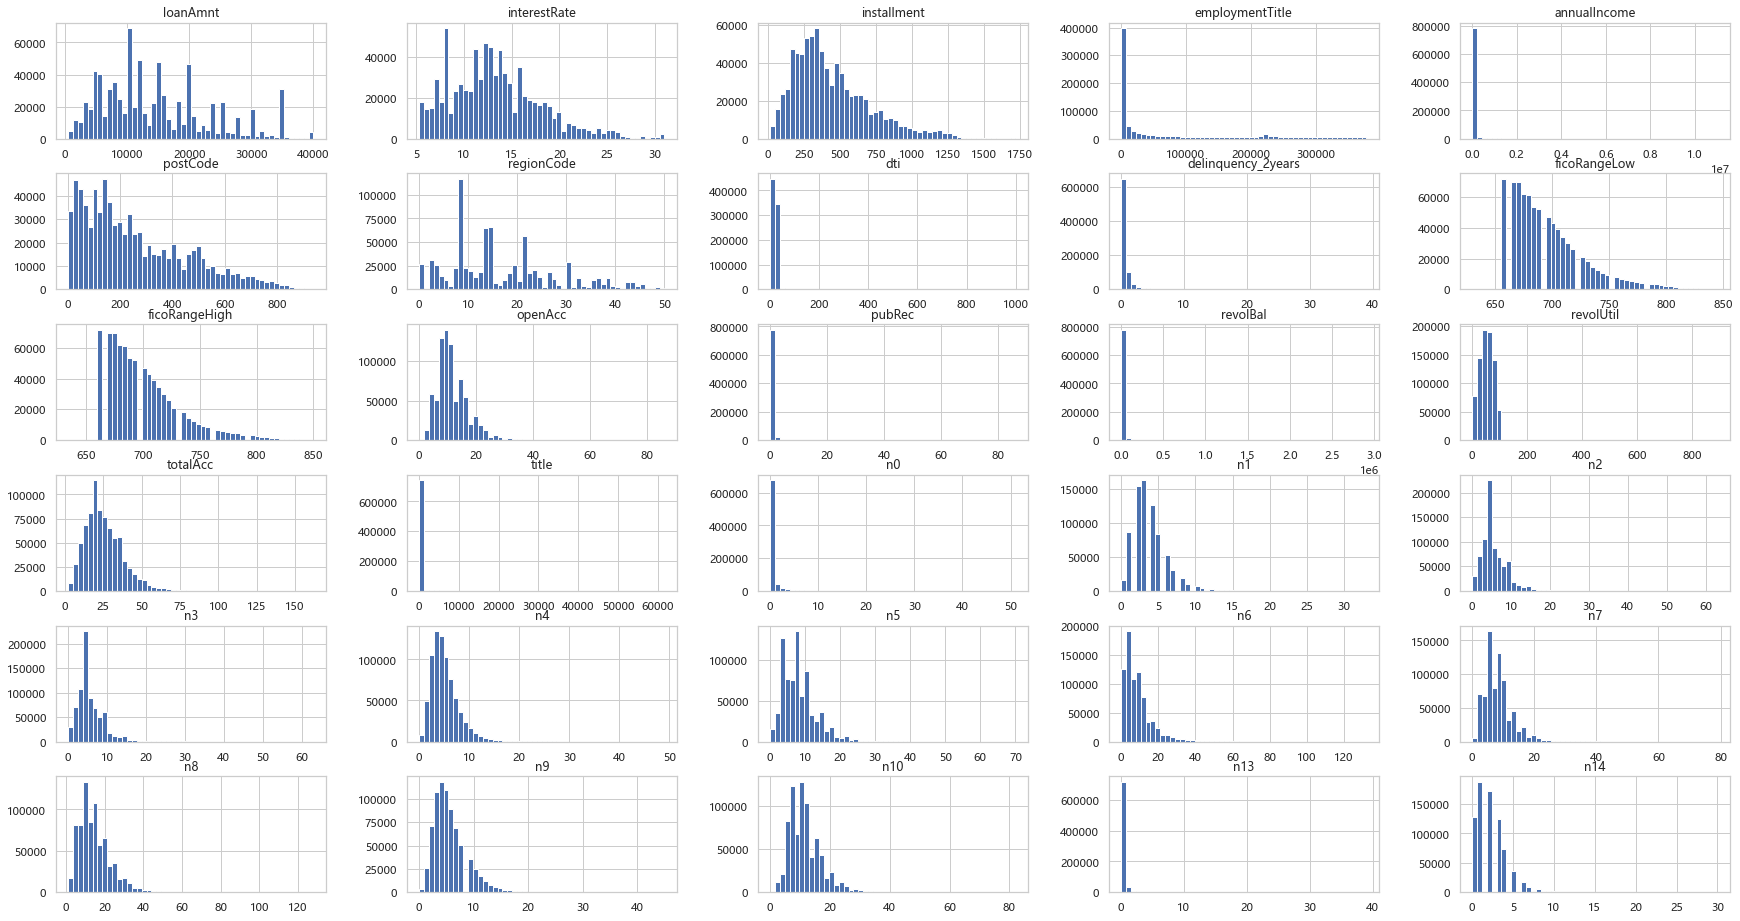

In [42]:
train[serial_feature].hist(figsize=(30,16),bins=50)
plt.savefig('serial_feature.png')

AttributeError: 'list' object has no attribute 'bar'

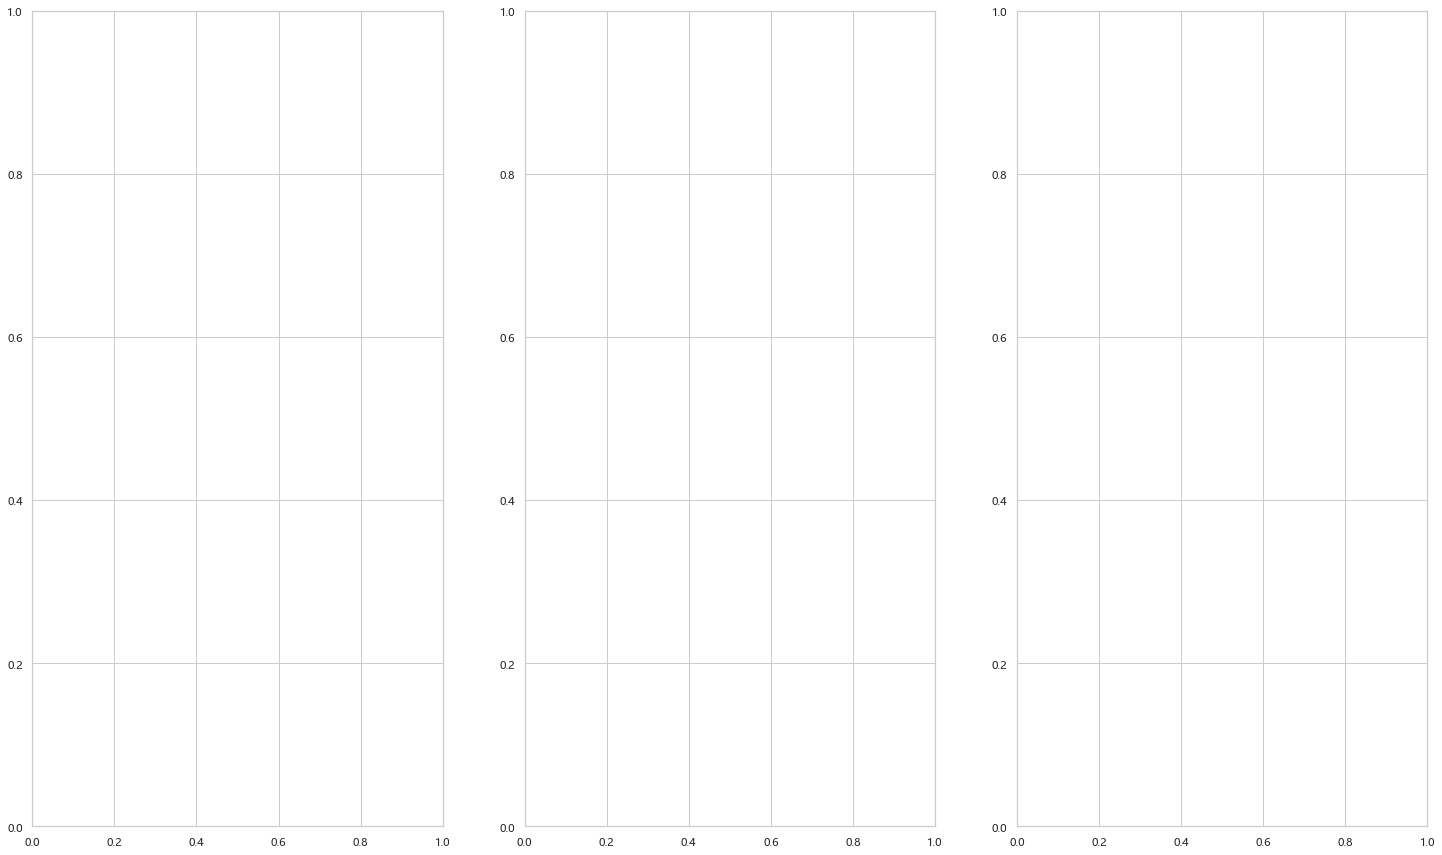

In [47]:
fig,ax=plt.subplots(1,3,figsize=(25,15))
for i in range(len(category_feature[:-2])):
    sns.countplot(x=category_feature[i],data=train,ax=[0,i])
plt.show()

In [51]:
train.isDefault

0         1
1         0
2         0
3         0
4         0
         ..
799995    0
799996    0
799997    1
799998    0
799999    0
Name: isDefault, Length: 800000, dtype: int64

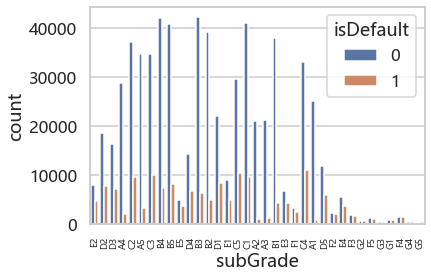

In [67]:
fig,ax=plt.subplots()
sns.countplot(x='subGrade', hue='isDefault', data=train)
#ax.set_xticklabelsa(rotation=90)
plt.xticks(rotation=90,fontsize=9)
plt.show()

In [79]:
train_earliesCreditLine_year = train['earliesCreditLine'].apply(lambda x:x[-4:]).astype('int64')
train_issueDate_year = train['issueDate'].apply(lambda x:x[:4]).astype('int64')
train['CreditLine'] = train_issueDate_year - train_earliesCreditLine_year
train = train.drop(['earliesCreditLine','issueDate'],axis=1)

<Figure size 864x576 with 0 Axes>

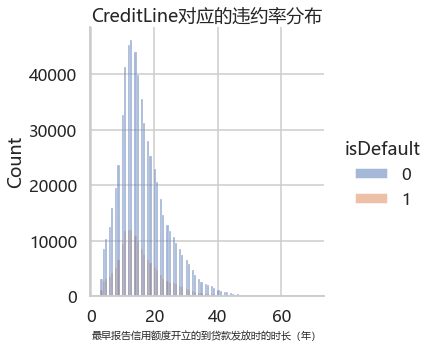

In [132]:
plt.figure(figsize=(12,8))
sns.displot(x='CreditLine', hue='isDefault', data=train,bins=100)
plt.xlabel('最早报告信用额度开立的到贷款发放时的时长（年）',size=10)
plt.title('CreditLine对应的违约率分布',size=18)
plt.savefig('CreditLine对应的违约率分布.png')
plt.show()


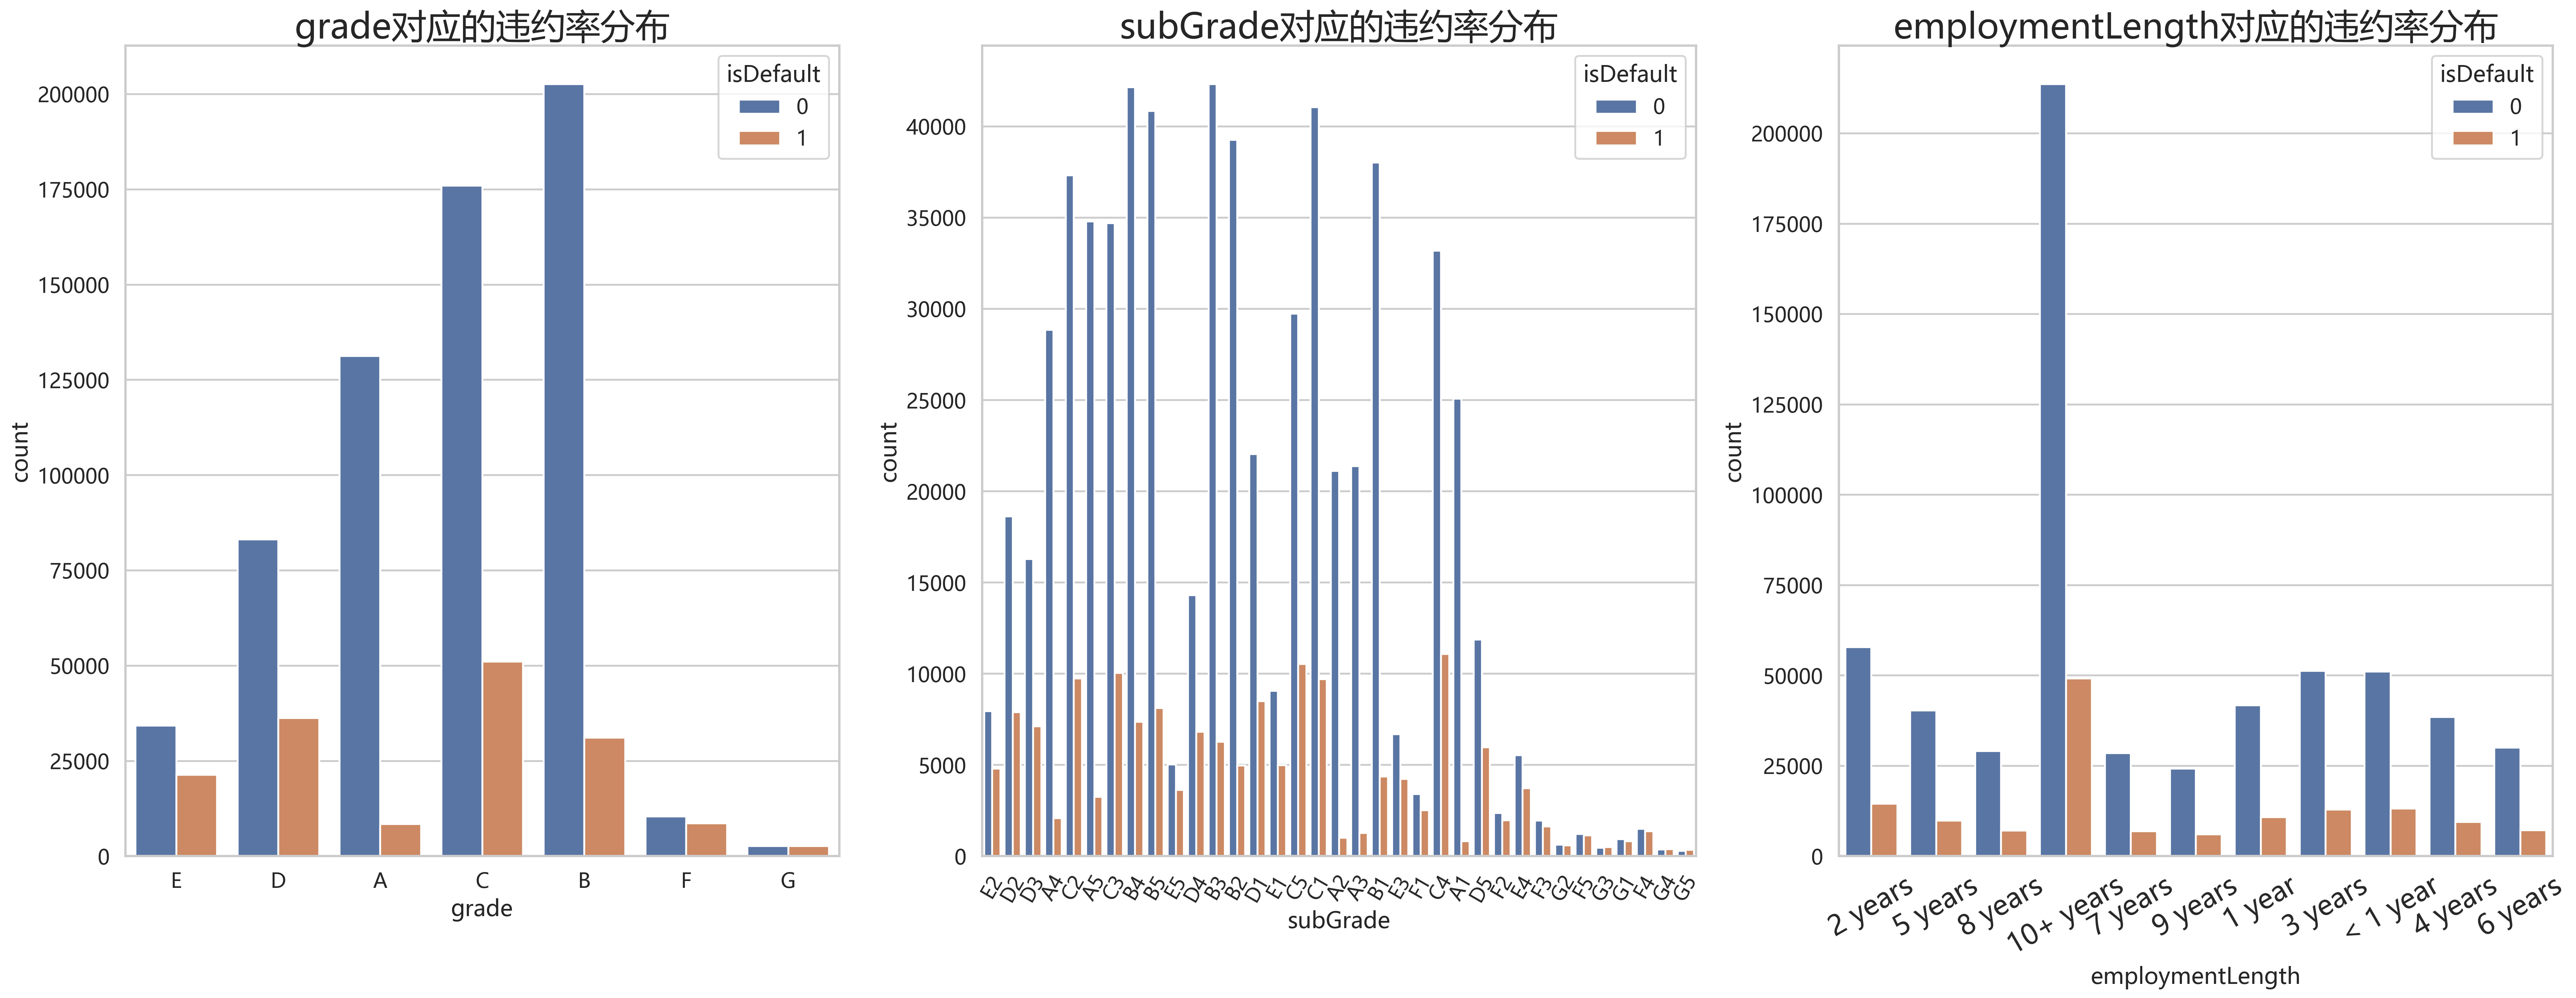

In [137]:
s=28
fig, ax = plt.subplots( figsize=(35,12),dpi=260)
plt.subplot(131)
sns.countplot(x='grade', hue='isDefault', data=train,)
plt.title('grade对应的违约率分布',size=s)
plt.subplot(132)
sns.countplot(x='subGrade', hue='isDefault', data=train)
plt.title('subGrade对应的违约率分布',size=s)
plt.xticks(rotation=60,fontsize=16)
plt.subplot(133)
sns.countplot(x='employmentLength', hue='isDefault', data=train)
plt.title('employmentLength对应的违约率分布',size=s)
plt.xticks(rotation=30,fontsize=22)
plt.savefig('三个字符型变量的违约率分布.png')
plt.show()


ConversionError: Failed to convert value(s) to axis units: 0           2 years
1           5 years
2           8 years
3         10+ years
4               NaN
            ...    
799995      7 years
799996    10+ years
799997    10+ years
799998    10+ years
799999      5 years
Name: x, Length: 800000, dtype: object

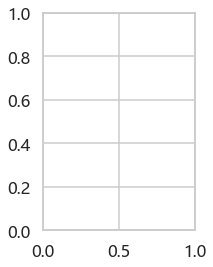

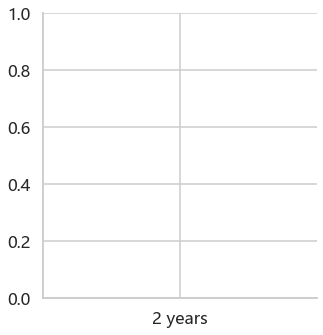

In [103]:
plt.subplot(121)
sns.displot(x='employmentLength', hue='isDefault', data=train)
plt.title('employmentLength对应的违约率分布')
plt.subplot(122)
sns.displot(x='CreditLine', hue='isDefault', data=train,bins=50)
plt.title('CreditLine对应的违约率分布')
plt.show()

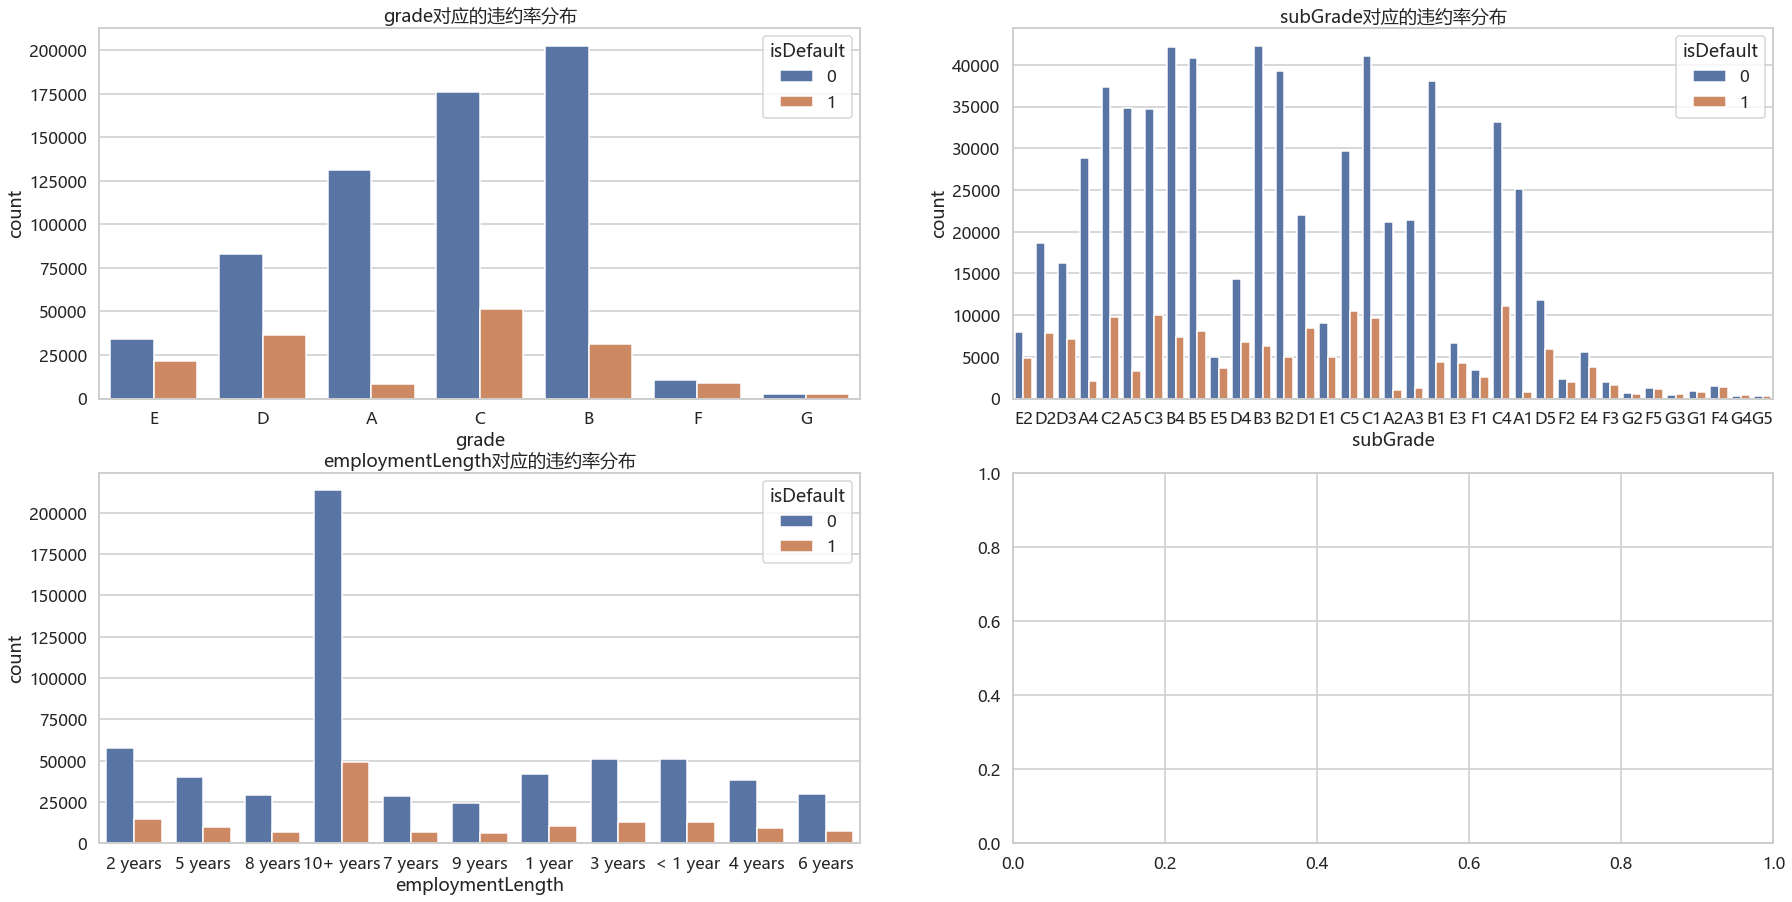

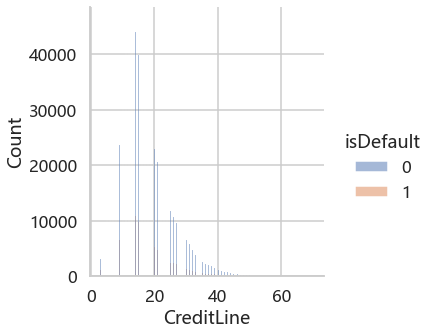

In [91]:
"""不同类型的特征对应的用户风险情况（少类别特征）"""
fig, ax = plt.subplots(2, 2, figsize=(30,15))
sns.countplot(x='subGrade', hue='isDefault', data=train, ax=ax[ 0,1])
sns.countplot(x='grade', hue='isDefault', data=train, ax=ax[ 0,0])
sns.countplot(x='employmentLength', hue='isDefault', data=train, ax=ax[1,0])

# 设置标题
ax[0,1].set_title('subGrade对应的违约率分布')
# plt.xticks(rotation=90)
ax[ 0,0].set_title('grade对应的违约率分布')
ax[ 1,0].set_title('employmentLength对应的违约率分布')
#ax[1,0].xticks(rotate=90,fontsize=9)
plt.subplot(224)
sns.displot(x='CreditLine', hue='isDefault', data=train)

plt.show()

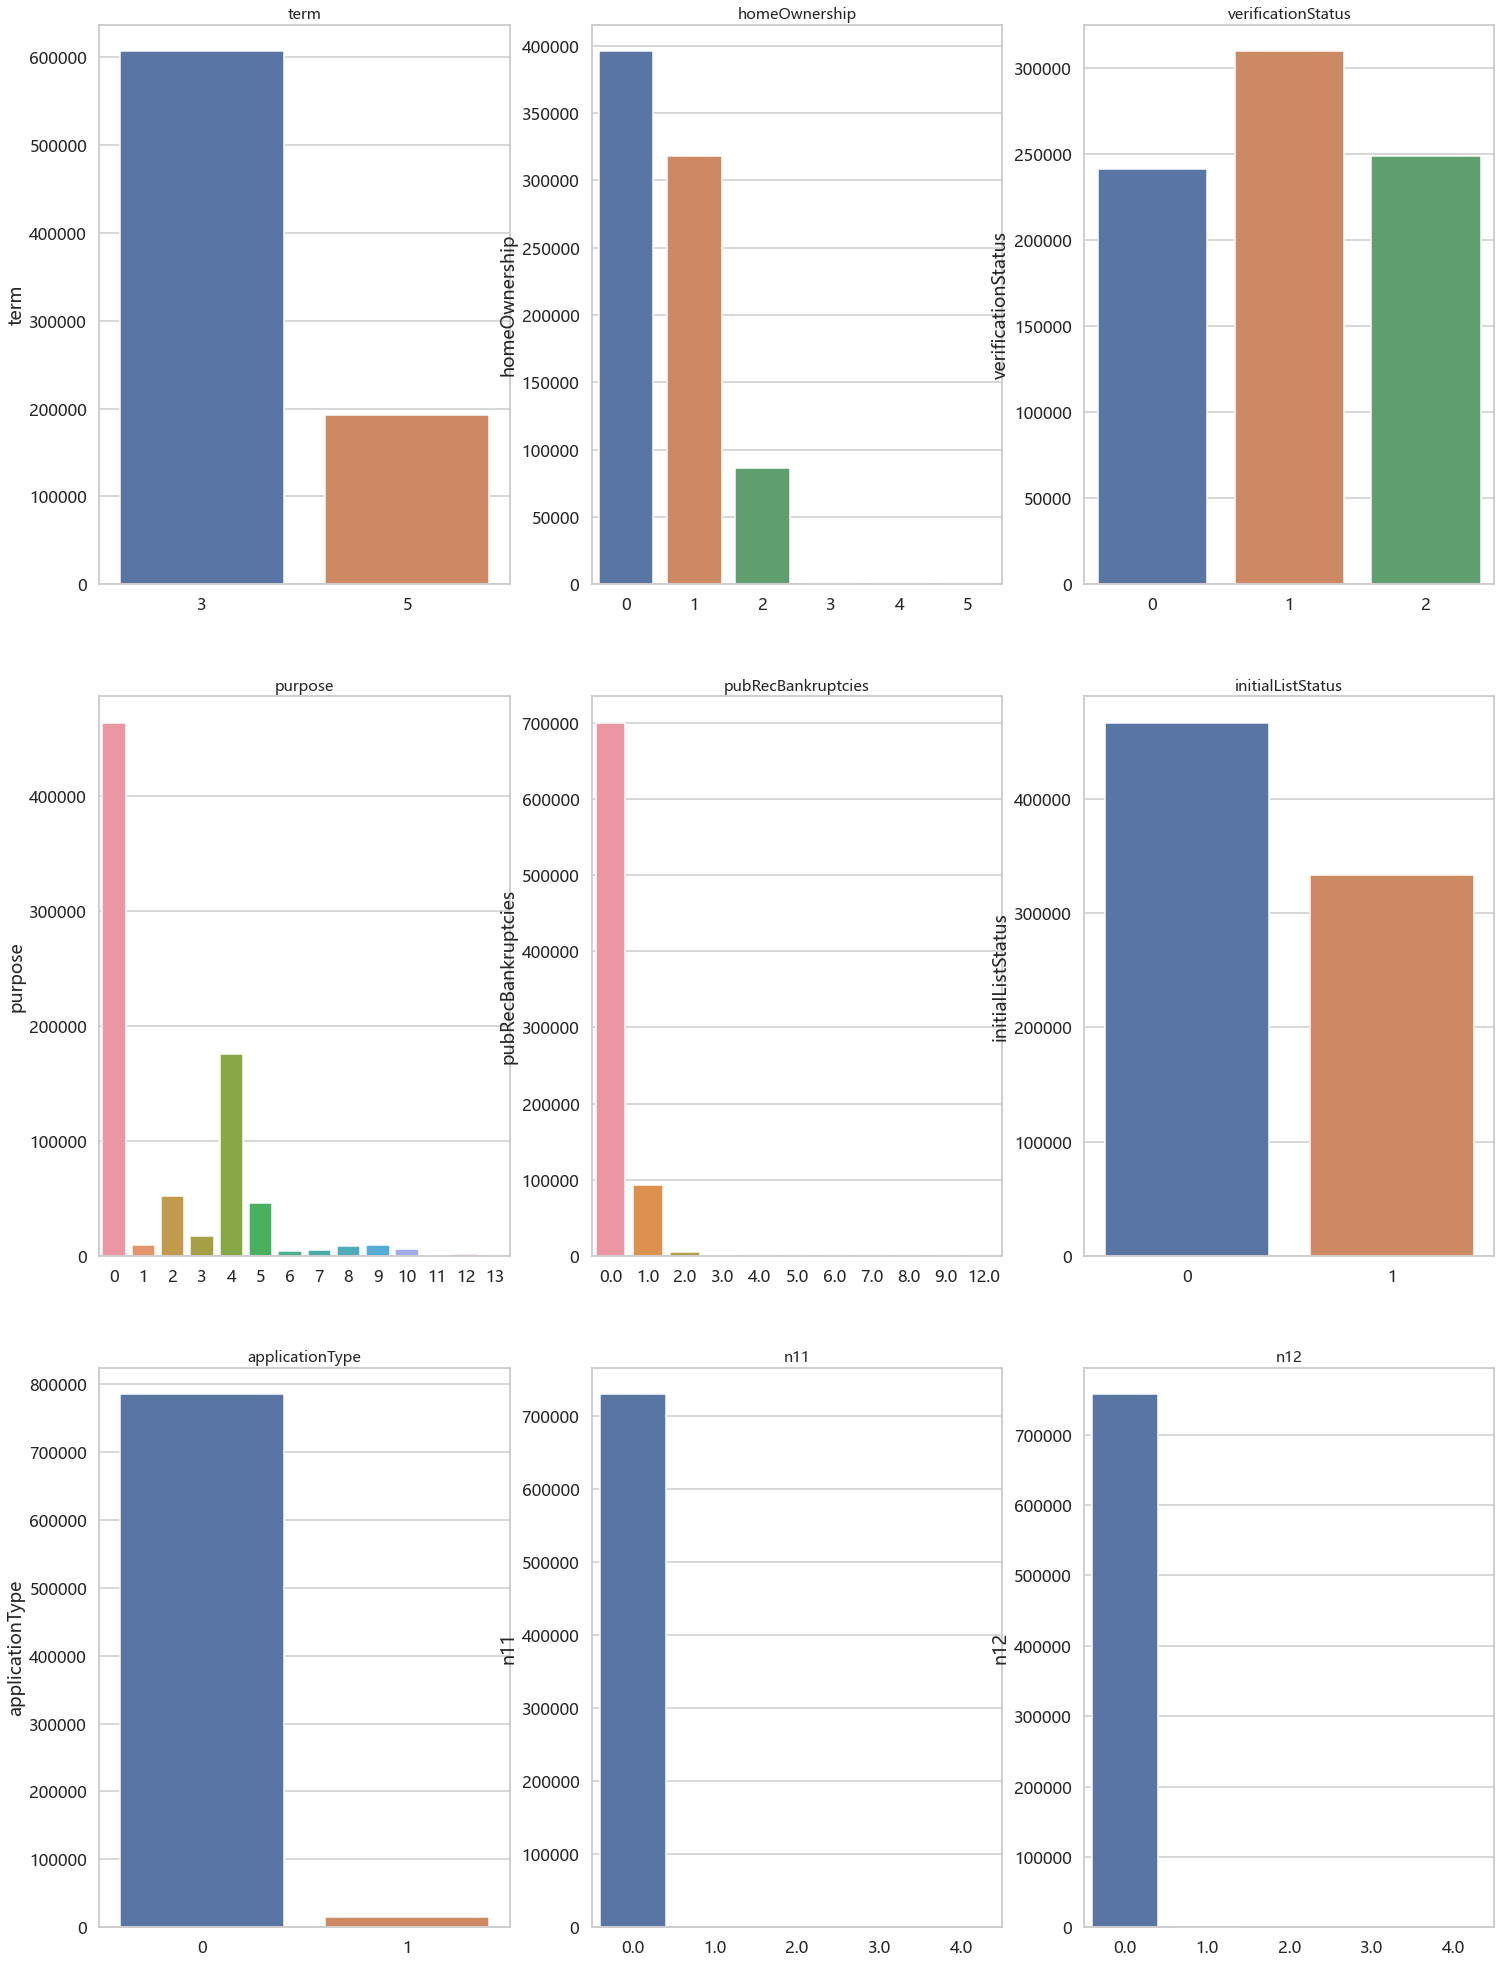

In [48]:
sns.set_context('talk')
fig,ax=plt.subplots(3,3,figsize=(25,35))
for i in range(9):
    row=int(i/3);col=i-row*3
    sns.barplot(train[discrete_feature[i]].value_counts().keys(),
    train[discrete_feature[i]].value_counts(),ax=ax[row,col])
    ax[row,col].set_title(discrete_feature[i],size=15)
    ax[row,col].set_title(discrete_feature[i],size=15)
#plt.savefig('分类变量.png')
plt.show()

# 离散型变量


In [138]:
len(discrete_feature)

9

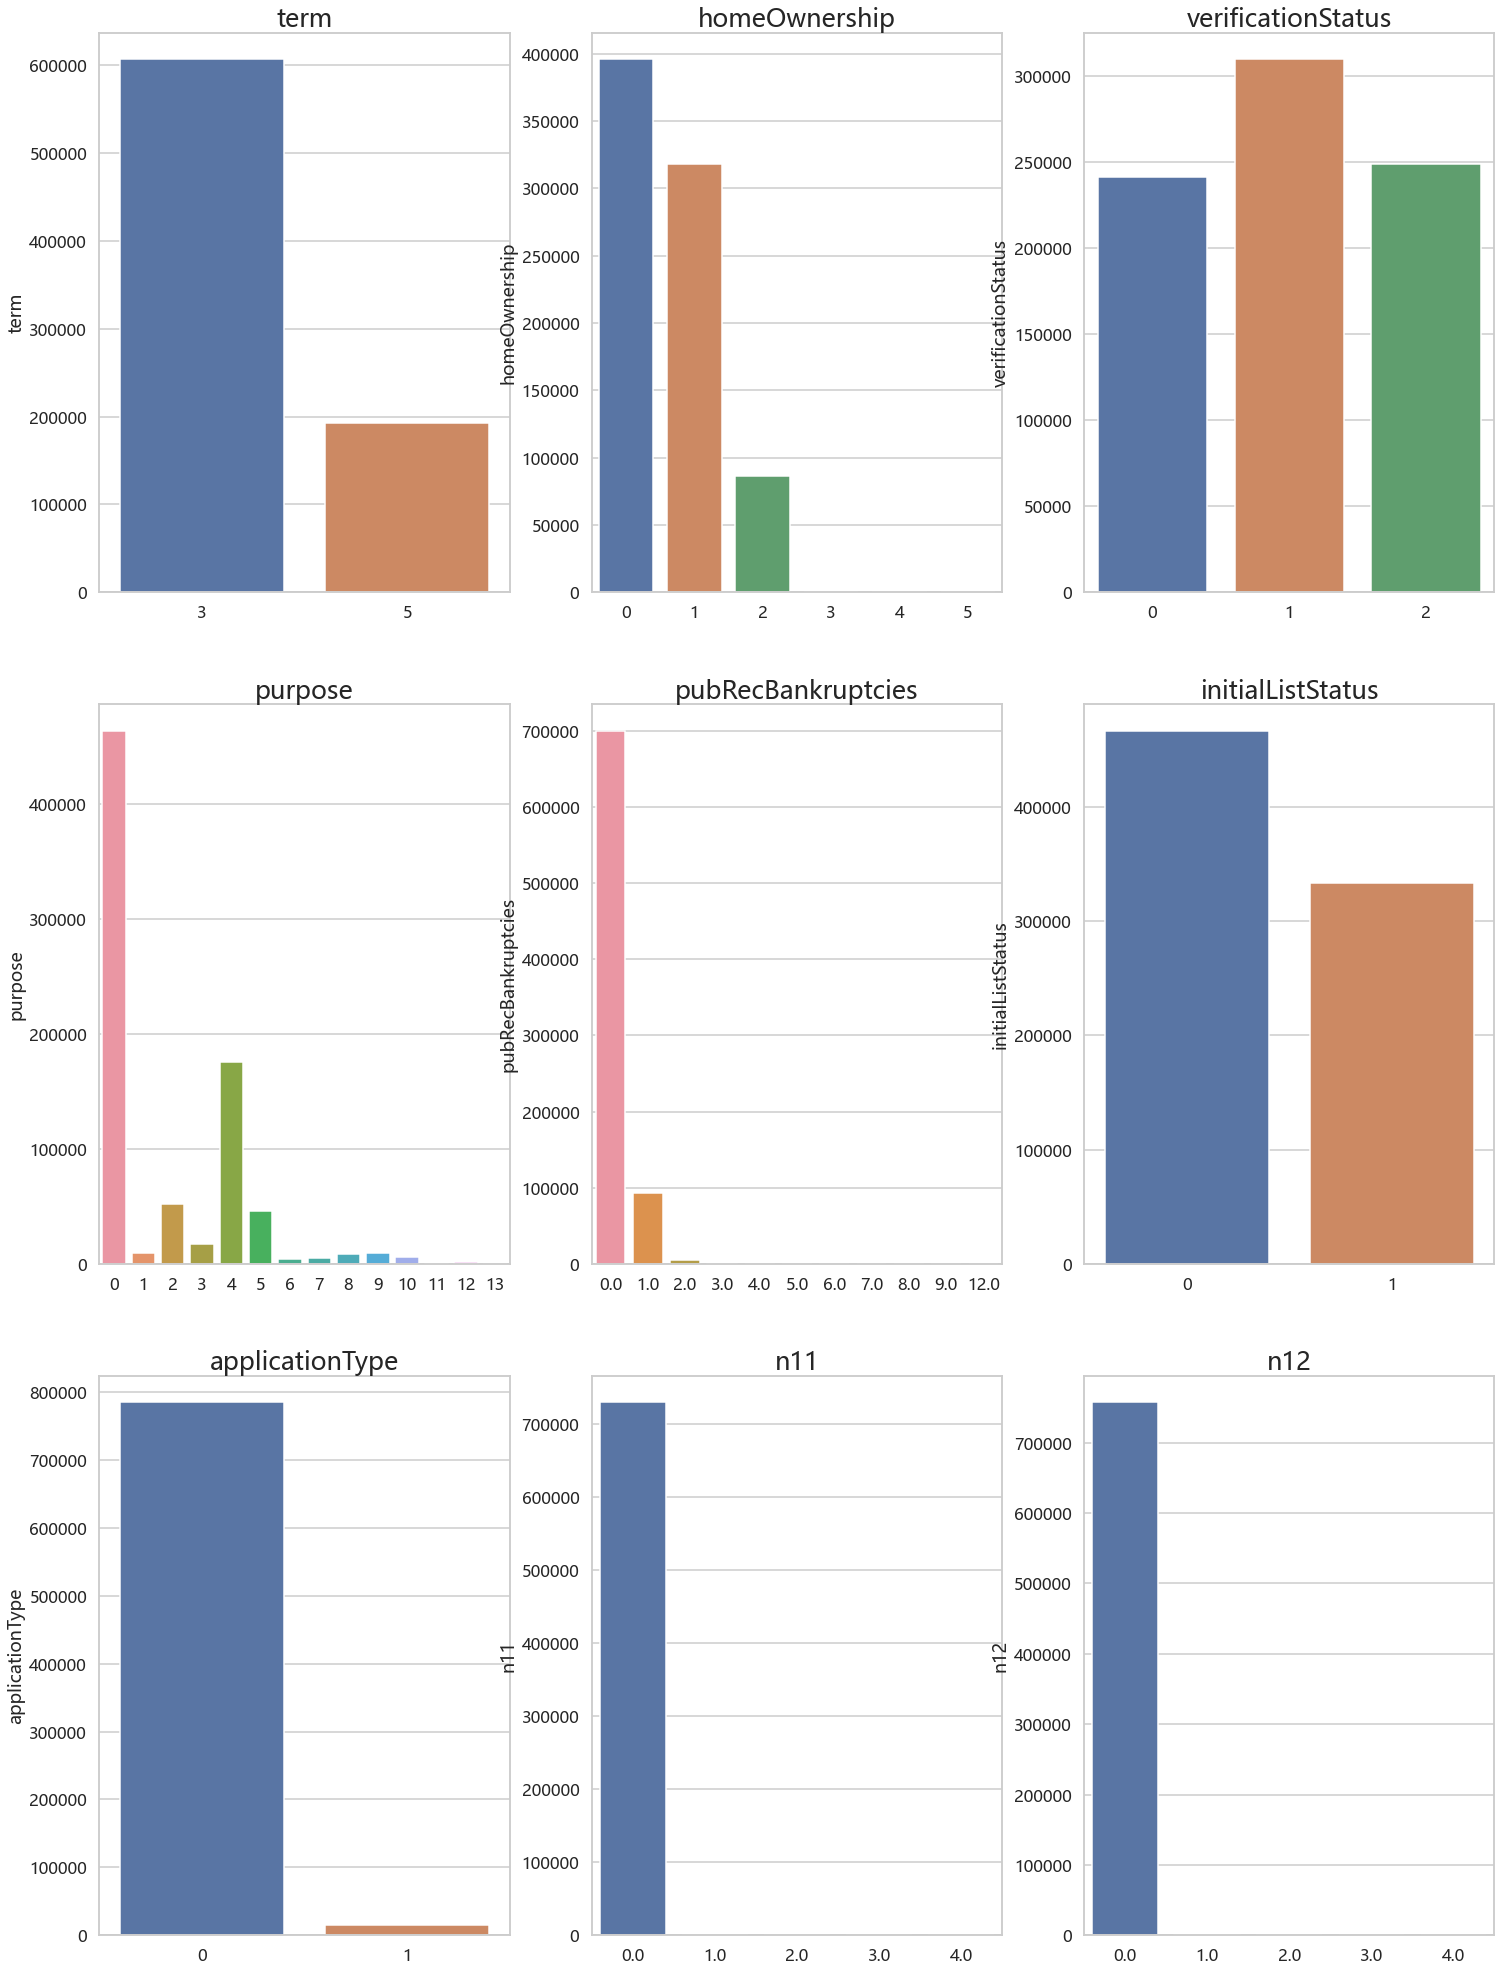

In [141]:
sns.set_context('talk')
fig,ax=plt.subplots(3,3,figsize=(25,35))
for i in range(9):
    row=int(i/3);col=i-row*3
    sns.barplot(train[discrete_feature[i]].value_counts().keys(),
    train[discrete_feature[i]].value_counts(),ax=ax[row,col])
    ax[row,col].set_title(discrete_feature[i],size=25)
plt.savefig('分类变量.png')
plt.show()